In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.dropna(inplace = True)


In [5]:
max_global = df['Global_Sales'].max()
df[df['Global_Sales'] == max_global]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [6]:
 year_sales = df.groupby('Year')['Global_Sales'].sum()

In [7]:
year_sales

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [8]:
max_year = year_sales.max()
year_sales[year_sales == max_year]

Year
2008.0    678.9
Name: Global_Sales, dtype: float64

In [9]:
genre =df['Genre'].value_counts()

<Axes: xlabel='Genre'>

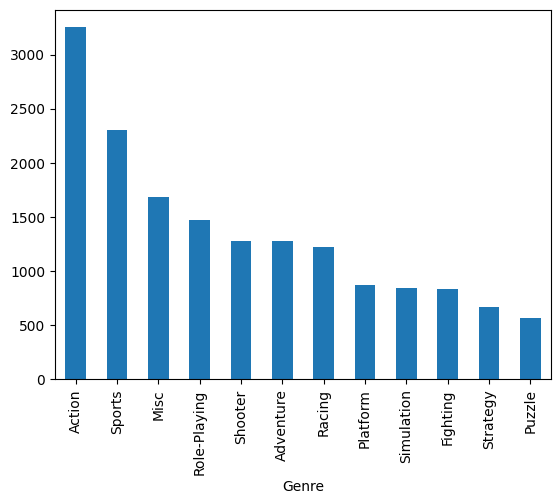

In [10]:
genre.plot(kind='bar')

What was the best selling game in 2012?What was the platfrom and did that platform preform well? What region sold the most in that year ? 

In [11]:
year_2012 = df[df['Year'] == 2012]

In [12]:
year_2012_max =  year_2012['Global_Sales'].max()
year_2012[year_2012['Global_Sales'] == year_2012_max]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


In [13]:
df_platform_2012 = pd.DataFrame(year_2012.groupby('Platform')['Global_Sales'].sum())

In [14]:
df_platform_2012

,Global_Sales
Platform,
3DS,51.14
DS,11.59
PC,23.53
PS3,109.49
PSP,7.72
PSV,18.53
Wii,22.77
WiiU,17.84
X360,100.88


<Axes: xlabel='Platform'>

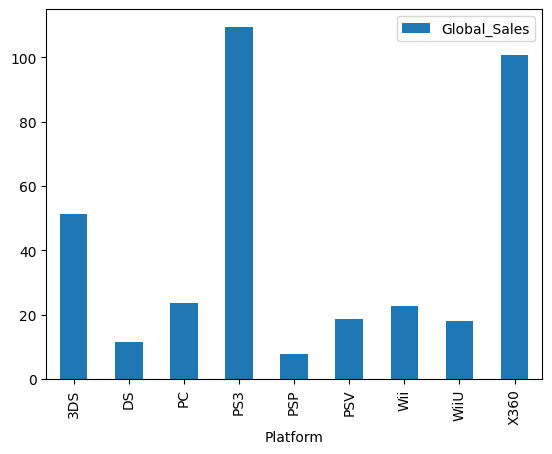

In [15]:
df_platform_2012.plot(kind='bar')

Would imply that what console game is made on transalte to amount of sales


In [16]:
 region = year_2012[['JP_Sales','EU_Sales','NA_Sales','Other_Sales']].sum()

<Axes: >

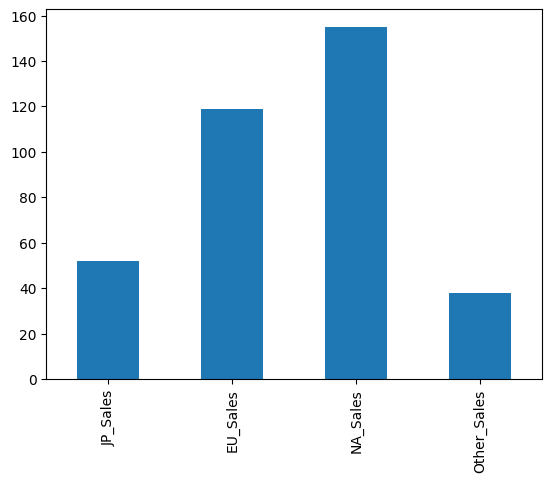

In [17]:
region.plot(kind='bar')

Linnear regression based on the year 2012? 

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
NA = year_2012[year_2012['NA_Sales'] > 1.3]

In [145]:
NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
65,66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
81,82,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33
111,112,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.14,2.21,0.00,0.56,6.91
128,129,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
172,173,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.30
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20


In [146]:
EU = year_2012[year_2012['EU_Sales'] > 1]

In [147]:
EU

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
65,66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
81,82,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
111,112,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.14,2.21,0.00,0.56,6.91
128,129,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
172,173,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.30


In [148]:
x=np.array(NA['NA_Sales'])
y=np.array(EU['EU_Sales'])

In [149]:
x

array([4.99, 8.25, 3.66, 6.63, 2.01, 2.91, 4.14, 2.64, 3.13, 2.43, 2.32,
       2.55, 1.89, 1.94, 1.38, 2.6 , 2.53, 1.56, 2.11, 1.72])

In [150]:
y

array([5.88, 4.3 , 3.07, 2.36, 2.32, 1.86, 5.05, 2.21, 2.56, 1.71, 2.15,
       1.3 , 3.48, 1.11, 1.75, 1.17, 1.35, 1.51, 1.06, 1.07])

In [151]:
linreg = LinearRegression()

In [152]:
x=x.reshape(-1,1)

In [153]:
linreg.fit(x,y)

LinearRegression()

In [154]:
y_pred=linreg.predict(x)

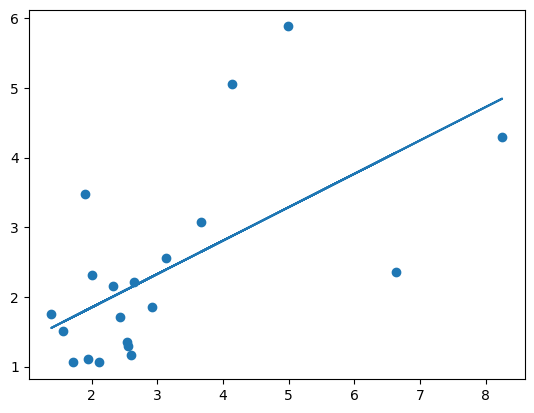

In [155]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [157]:
print(linreg.coef_)


[0.47881088]


Y intercept

In [158]:
print(linreg.intercept_) 

0.8937900023307972
